# Espectro de amplitude de uma seção sísmica

Este notebook tem a intenção de demonstrar como encontrar o espectro de amplitude de um dado sísmico. Esta abordagem servirá posteriormente para calcular uma filtragem na frequência, dentre outras aplicações. Este código está inserido em uma das aulas de processamento de dados sísmicos. 

## Os dados utilizados

Aqui utilizaremos um conjunto de dados do Sul do Texas, do campo de exploração [Stratton](https://wiki.seg.org/wiki/Stratton_3D_survey). Este é um dado terrestre 3D pós-empilhamento. Excelente para testar algoritmos ou quaisquer outras aplicações de dados sísmicos. Estes dados foram cedido pelo [Departamento de Geologia Econômica da Universidade do Texas](https://www.beg.utexas.edu/).

## Carregamento dos arquivos SEGY em Python

O carregamento destes dados pode ser realizado pela biblioteca [SEGYio](https://github.com/equinor/segyio), que é desenvolvida em linguagens C e Python. Além do formato SEGY, esta biblioteca tem forte interação com formato de dados do Seismic Unix. Este biblioteca é desenvolvida pela [Equinor](https://www.equinor.com.br/). 

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq, rfftfreq, rfft

## Imprimindo o Header e as informações do arquivo

In [2]:
with segyio.open("data_set/Stratton3D.sgy",ignore_geometry=True) as f:
    print (f.text)

bytearray(b'C01 STRATTON 3D Data Set                                            
            C02                                                                 
            C03 32-bit 3-D Volume                                               
            C04                                                                 
            C05                                                                 
            C06 DATA FORMAT      : IBM FLOATING POINT                           
            C07                                                                 
            C08 HEADER PARAMETER VALUE LOCATIONS:                               
            C09 PARAMETER NAME       HEADER CONTAINING VALUE    BYTE RANGE      
            C10 ==========================================================      
            C11   LINE NUMBER          BINARY                       5 - 8       
            C12   DATA FORMAT CODE     BINARY                      25 - 26      
            C13             

In [3]:
with segyio.open("data_set/Stratton3D.sgy",iline=73,xline=77) as f:
    print (f)
    n_ilines = f.ilines
    n_cross = f.xlines
    depth = f.depth_slice[1000]
    inline = f.iline[f.ilines[102]]
    crossline = f.xline[f.xlines[101]]
    time = f.samples

SegyFile data_set/Stratton3D.sgy:
  inlines: 230 [2193745, 2181150]
  crosslines: 309 [705550, 722490]
  traces: 71070
  samples: [0.000e+00 2.000e+00 4.000e+00 ... 2.996e+03 2.998e+03 3.000e+03]
  float representation: 4-byte IBM float


In [4]:
inline.shape

(309, 1501)

## Visualização dos dados sísmicos

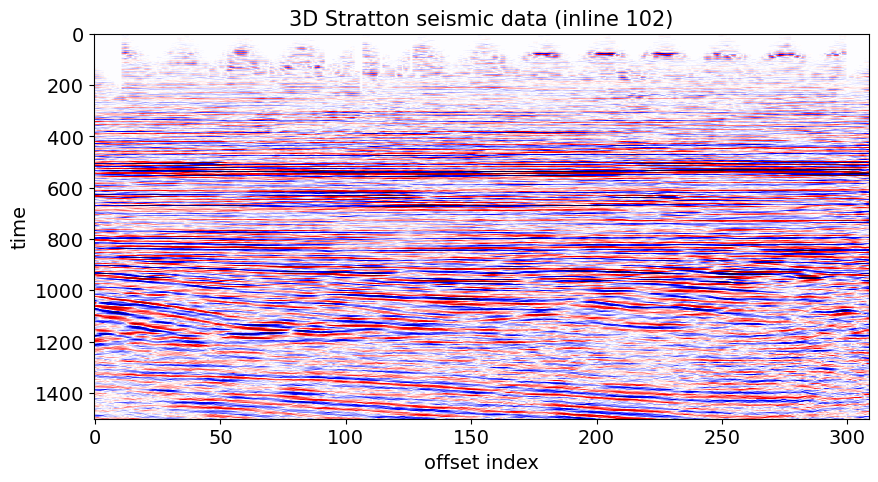

In [5]:
clip = np.percentile(np.abs(crossline), 99.0)
title_font = 15
bottom_font = 14

plt.figure(figsize=(10, 5))
plt.title('3D Stratton seismic data (inline 102)',size=title_font)
plt.imshow(inline.T,aspect="auto",cmap="seismic_r",vmax = clip,vmin=-clip)
plt.xlabel('offset index',size=bottom_font)
plt.ylabel('time',size=bottom_font)
plt.xticks(size=bottom_font)
plt.yticks(size=bottom_font)
plt.show()

## Calculando o espectro de amplitude para a seção Sísmica inteira

In [6]:
dt = (np.max(1e-3*time)-np.min(1e-3*time))/(time.size-1)

In [7]:
freq = rfftfreq(time.size, d=dt)
inline_fft = rfft(inline, axis=1)
amplitude = np.mean(np.abs(inline_fft),axis=0)

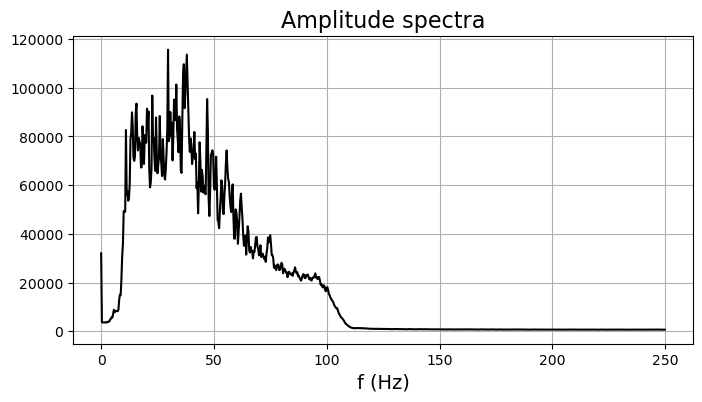

In [8]:
plt.figure(figsize=(8,4))

plt.title('Amplitude spectra', fontsize=16)
plt.plot(freq, amplitude.real, 'k-')
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.show()